# Proyek Analisis Data: Bikesharing Dataset
- Nama        : Mohammad Fikry Al Akrom
- Email       : fikryakrom@gmail.com
- Dicoding ID : fikryakrom

## Menentukan Pertanyaan Bisnis

1.   Kapan kegiatan *bike sharing* secara konsisten lebih tinggi? Pada hari apa? Pada jam berapa?
2.   Apakah terdapat perbedaan *demand bike sharing* menurut cuaca?
3.   Bagaimana perubahan *demand bike sharing* setiap bulan? Pada bulan apa *demand bike sharing* mencapai tingkat tertinggi?
4.   Apakah terdapat perbedaan penggunaan jasa *bike sharing* antara *weekdays* dan *weekend*?

## Installing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Kaggle Configuration
import zipfile
import os

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"fikryakrom","key":"e888a3f197523c45589cad917bf8d991"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

## Data Wrangling

### Gathering Data

In [3]:
# Importing datasets from Kaggle
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

100% 286k/286k [00:00<00:00, 639kB/s]
100% 286k/286k [00:00<00:00, 638kB/s]


In [4]:
# Zip file extraction
zip_ref = zipfile.ZipFile('bike-sharing-dataset.zip', 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [5]:
# Reading hour datasets
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# Reading day datasets
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [7]:
# Checking Data Type
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [8]:
# Checking NaN/Null Data
day_df.isna().sum()
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Checking Duplicates
day_df.duplicated().sum()

0

In [10]:
hour_df.duplicated().sum()

0

### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore **day_df**

In [11]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [12]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Explore **hour_df**

In [13]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [14]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Preparing Dataframe

In [15]:
# Merging Dataframe
bike_sharing = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_hourly', '_daily'))
bike_sharing.head()

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_hourly     17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_hourly      17379 non-null  int64  
 3   yr_hourly          17379 non-null  int64  
 4   mnth_hourly        17379 non-null  int64  
 5   holiday_hourly     17379 non-null  int64  
 6   weekday_hourly     17379 non-null  int64  
 7   workingday_hourly  17379 non-null  int64  
 8   weathersit_hourly  17379 non-null  int64  
 9   temp_hourly        17379 non-null  float64
 10  atemp_hourly       17379 non-null  float64
 11  hum_hourly         17379 non-null  float64
 12  windspeed_hourly   17379 non-null  float64
 13  casual_hourly      17379 non-null  int64  
 14  registered_hourly  17379 non-null  int64  
 15  cnt_hourly         17379 non-null  int64  
 16  instant_daily      173

### Recode Label

In [17]:
# Weather Situation Label
weather_labels = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan Gerimis',
    4: 'Hujan Lebat'
}

bike_sharing['weather_labels'] = bike_sharing['weathersit_daily'].map(weather_labels)

In [18]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_hourly     17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_hourly      17379 non-null  int64  
 3   yr_hourly          17379 non-null  int64  
 4   mnth_hourly        17379 non-null  int64  
 5   holiday_hourly     17379 non-null  int64  
 6   weekday_hourly     17379 non-null  int64  
 7   workingday_hourly  17379 non-null  int64  
 8   weathersit_hourly  17379 non-null  int64  
 9   temp_hourly        17379 non-null  float64
 10  atemp_hourly       17379 non-null  float64
 11  hum_hourly         17379 non-null  float64
 12  windspeed_hourly   17379 non-null  float64
 13  casual_hourly      17379 non-null  int64  
 14  registered_hourly  17379 non-null  int64  
 15  cnt_hourly         17379 non-null  int64  
 16  instant_daily      173

In [19]:
bike_sharing.describe(include='all')

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,...,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily,weather_labels
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11413
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan kegiatan *bike sharing* secara konsisten lebih tinggi? Pada hari apa? Pada jam berapa?

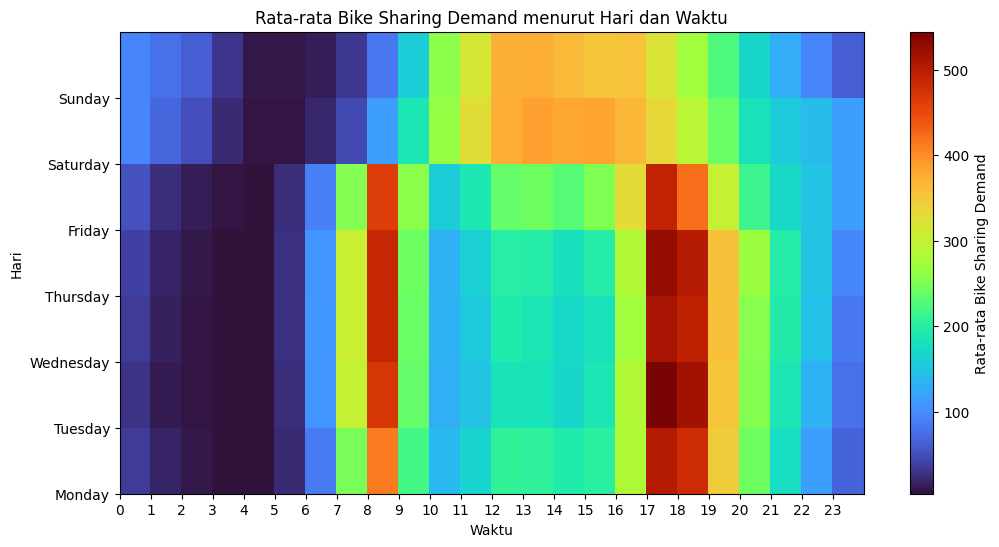

In [29]:
# Convert 'dteday' to datetime format
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

# Extract day and hour information
bike_sharing['day'] = bike_sharing['dteday'].dt.day_name()
bike_sharing['hour'] = bike_sharing['hr']

# Group by day and hour, calculate mean demand
demand_by_day_hour = bike_sharing.groupby(['day', 'hour'])['cnt_daily'].mean().unstack()

# Define the order of days (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the DataFrame based on the custom order of days
demand_by_day_hour = demand_by_day_hour.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
plt.pcolor(demand_by_day_hour, cmap='turbo')
plt.colorbar(label='Rata-rata Bike Sharing Demand')
plt.xlabel('Waktu')
plt.ylabel('Hari')
plt.title('Rata-rata Bike Sharing Demand menurut Hari dan Waktu')
plt.xticks(range(24), range(24))
plt.yticks(range(len(day_order)), day_order)
plt.show()


### Pertanyaan 2: Apakah terdapat perbedaan *demand bike sharing* menurut cuaca?

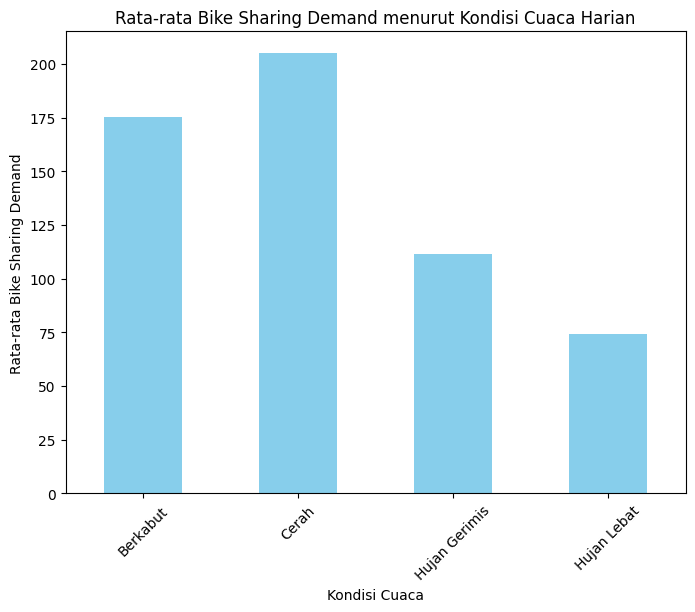

In [24]:
# Map weather situation to descriptive labels
bike_sharing['weather_situation'] = bike_sharing['weathersit_daily'].map(weather_labels)

# Group by weather situation and calculate mean demand
demand_by_weather = bike_sharing.groupby('weather_situation')['cnt_daily'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
demand_by_weather.plot(kind='bar', color='skyblue')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Bike Sharing Demand')
plt.title('Rata-rata Bike Sharing Demand menurut Kondisi Cuaca Harian')
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 3: Bagaimana perubahan *demand bike sharing* setiap bulan? Pada bulan apa *demand bike sharing* mencapai tingkat tertinggi?

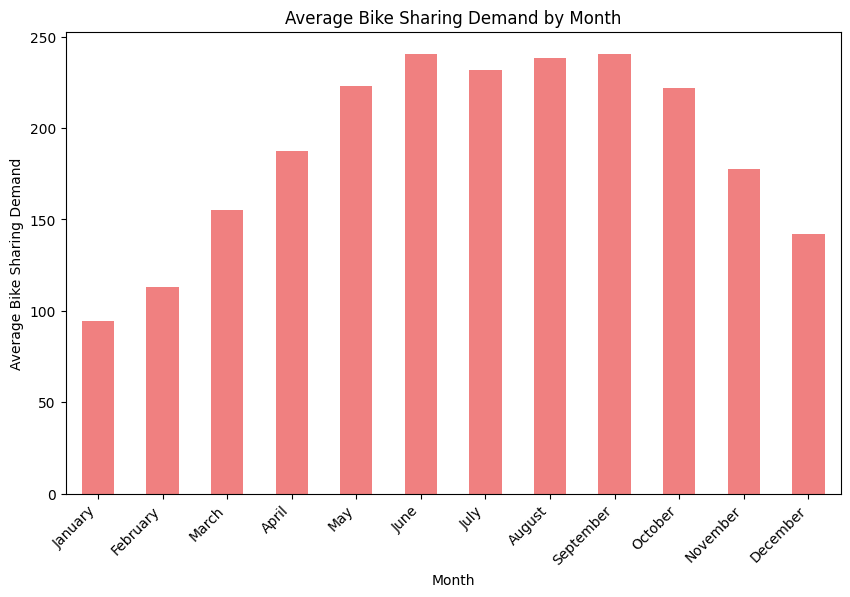

In [26]:
import calendar

# Group by month and calculate mean demand
demand_by_month = bike_sharing.groupby('mnth_daily')['cnt_daily'].mean()

# Map month numbers to month names
month_names = [calendar.month_name[i] for i in range(1, 13)]
demand_by_month.index = month_names

# Plot the bar chart
plt.figure(figsize=(10, 6))
demand_by_month.plot(kind='bar', color='lightcoral')
plt.xlabel('Month')
plt.ylabel('Average Bike Sharing Demand')
plt.title('Average Bike Sharing Demand by Month')
plt.xticks(rotation=45, ha='right')
plt.show()


### Pertanyaan 4: Apakah terdapat perbedaan penggunaan jasa *bike sharing* antara *weekdays* dan *weekend*?

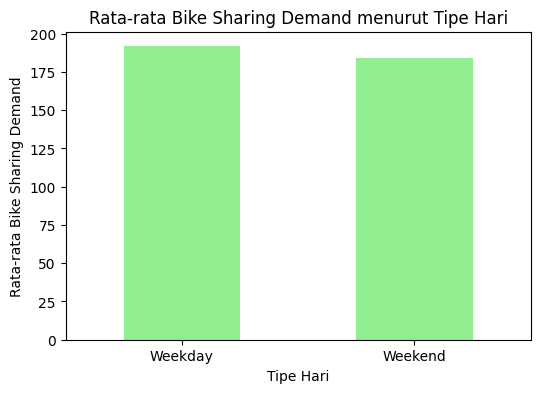

In [27]:
# Map day to weekday or weekend
bike_sharing['day_type'] = bike_sharing['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group by day type and calculate mean demand
demand_by_day_type = bike_sharing.groupby('day_type')['cnt_daily'].mean()

# Plot the bar chart
plt.figure(figsize=(6, 4))
demand_by_day_type.plot(kind='bar', color='lightgreen')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Bike Sharing Demand')
plt.title('Rata-rata Bike Sharing Demand menurut Tipe Hari')
plt.xticks(rotation=0)
plt.show()

## Conclusion

### Pertanyaan 1
- Kapan kegiatan *bike sharing* secara konsisten lebih tinggi? Pada hari apa? Pada jam berapa?
> Berdasarkan hasil visualisasi yang sudah ditampilkan, user lebih sering menggunakan jasa *bike sharing* pada hari kerja (Rabu paling tinggi), pada jam 17-19 (5-7 sore)



### Pertanyaan 2
- Apakah terdapat perbedaan *demand bike sharing* menurut cuaca?
> Berdasarkan hasil visualisasi yang sudah ditampilkan, user lebih sering menggunakan jasa *bike sharing* pada kondisi cuaca yang cerah.

  > Dapat dilihat bahwa penggunaan jasa *bike sharing* secara berurutan menurut kondisi cuaca dari tertinggi hingga terendah adalah: cerah-berkabut-hujan gerimis-hujan lebat



### Pertanyaan 3
- Bagaimana perubahan *demand bike sharing* setiap bulan? Pada bulan apa *demand bike sharing* mencapai tingkat tertinggi?
> Berdasarkan hasil visualisasi yang sudah ditampilkan, user lebih sering menggunakan jasa *bike sharing* pada kondisi cuaca yang cerah.

  > Dapat dilihat bahwa penggunaan jasa *bike sharing* mencapai titik tertinggi pada bulan Juni



### Pertanyaan 4
- Apakah terdapat perbedaan penggunaan jasa *bike sharing* antara *weekdays* dan *weekend*?
> Berdasarkan hasil visualisasi yang sudah ditampilkan, user lebih sering menggunakan jasa *bike sharing* pada weekday/hari kerja

